In [38]:
from scipy import signal
from scipy.signal import lfilter
import matplotlib.pyplot as plt
import numpy as np

In [39]:
fp = 8
fa = 12
Ap = 2
Aa = 30

In [40]:
fs = 100
sig_freqs = [1, 8, 10, 12, 50]
sig_dur = 1

In [41]:
N, beta = signal.kaiserord(Aa, (fa-fp)/(fs/2))

In [42]:
print(N, beta)

40 2.1166248611409806


In [43]:
taps = signal.firwin(N, cutoff=fa, window=('kaiser', beta), fs=fs)

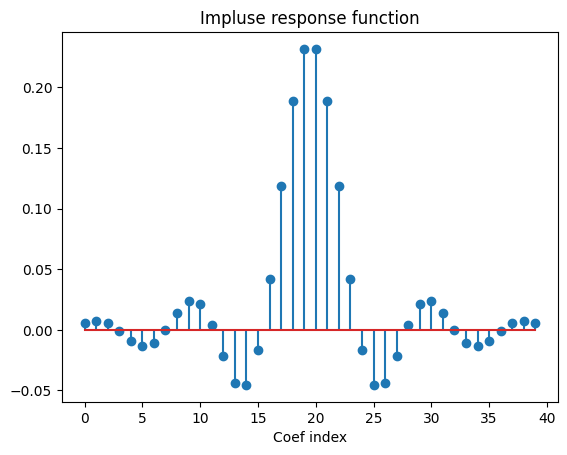

In [44]:
plt.stem(taps)
plt.xlabel('Coef index')
plt.title('Impluse response function')
plt.show()

In [45]:
w, h = signal.freqz(taps, 1)

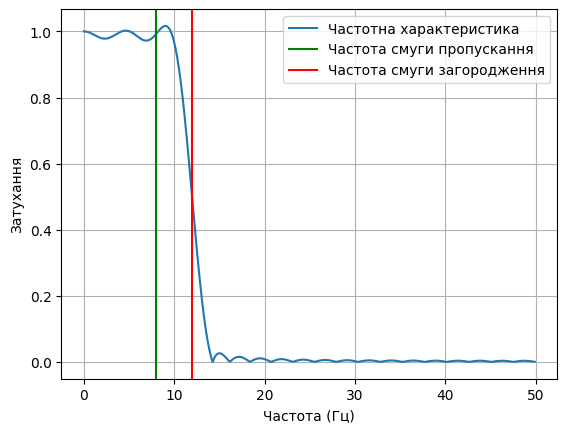

In [46]:
plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="Частотна характеристика")
plt.axvline(fp, color='green', label="Частота смуги пропускання")
plt.axvline(fa, color='red', label="Частота смуги загородження")
plt.xlabel('Частота (Гц)')
plt.ylabel('Затухання')
plt.grid(True)
plt.legend()
plt.show()

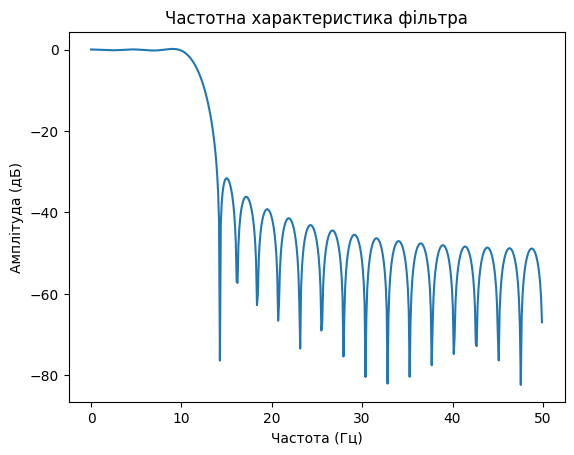

In [47]:
w, h_freqz = signal.freqz(taps)

# Обчислення ФП
h_phase = np.unwrap(np.angle(h_freqz))
h_db = 20*np.log10(np.abs(h_freqz))

# Візуалізація ЧХ
plt.plot((fs * 0.5 / np.pi) * w, h_db)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплітуда (дБ)')
plt.title('Частотна характеристика фільтра')
plt.show()

In [48]:
t = np.linspace(0, sig_dur, int(sig_dur * fs))
test_signal = np.zeros_like(t)
for cf in sig_freqs:
    test_signal += np.sin(2 * np.pi * cf * t)

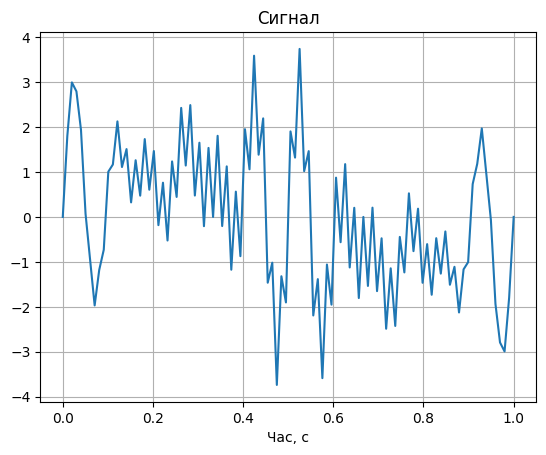

In [49]:
plt.plot(t, test_signal)
plt.xlabel("Час, с")
plt.title("Cигнал")
plt.grid()
plt.show()

In [50]:
filtered_signal = lfilter(taps, 1, test_signal)

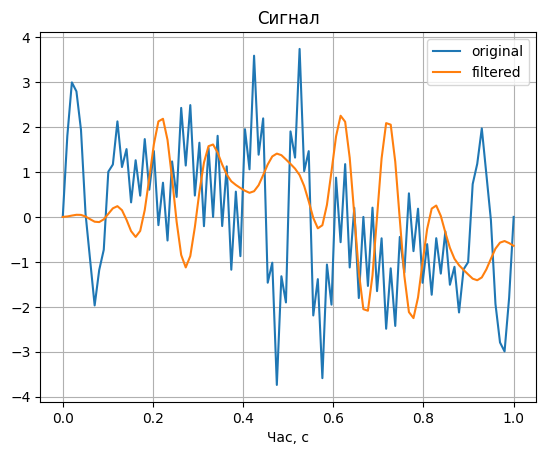

In [51]:
plt.plot(t, test_signal,label='original')
plt.plot(t, filtered_signal,label='filtered')
plt.xlabel("Час, с")
plt.title("Cигнал")
plt.legend()
plt.grid()

In [52]:
w, h = signal.freqz(taps)
nyq_rate = fs / 2
for cf in sig_freqs:
    index = int(cf / nyq_rate * len(w))
    gain = abs(h[index-1])
    print(f"Частота: {cf} Гц, Коэффіциєнт передачі: {gain}")

Частота: 1 Гц, Коэффіциєнт передачі: 0.9931829964624843
Частота: 8 Гц, Коэффіциєнт передачі: 0.9864520432774758
Частота: 10 Гц, Коэффіциєнт передачі: 0.9811733161898495
Частота: 12 Гц, Коэффіциєнт передачі: 0.5505661070906948
Частота: 50 Гц, Коэффіциєнт передачі: 0.00044846572342117826


In [53]:
N_tr = int(np.ceil((Aa - 8) / (2.285 * np.pi * (fa - fp) / fs))) + 1
N_tr += 1 if N_tr % 2 == 0 else 0
# створюємо фільтр з трикутним вікном
taps_tri = signal.firwin(N_tr, cutoff=fa, window='triang', fs=fs)

In [54]:
taps_rect = signal.firwin(101, cutoff=fa, window='boxcar', fs=fs)

In [55]:
taps_hamm = signal.firwin(N, cutoff=fa, window='hamming', fs=fs)

In [56]:
# Визначення розміру фільтру
N_blackman = int(np.ceil((Aa - 8) / (4.57 * (fp / fs))))
taps_black = signal.firwin(N_blackman, cutoff=fa, window='blackman', fs=fs)

In [57]:
filters_names = ["rectangle", "triangle", "hamming", "blackman"]
filters = [taps_rect, taps_tri, taps_hamm, taps_black]

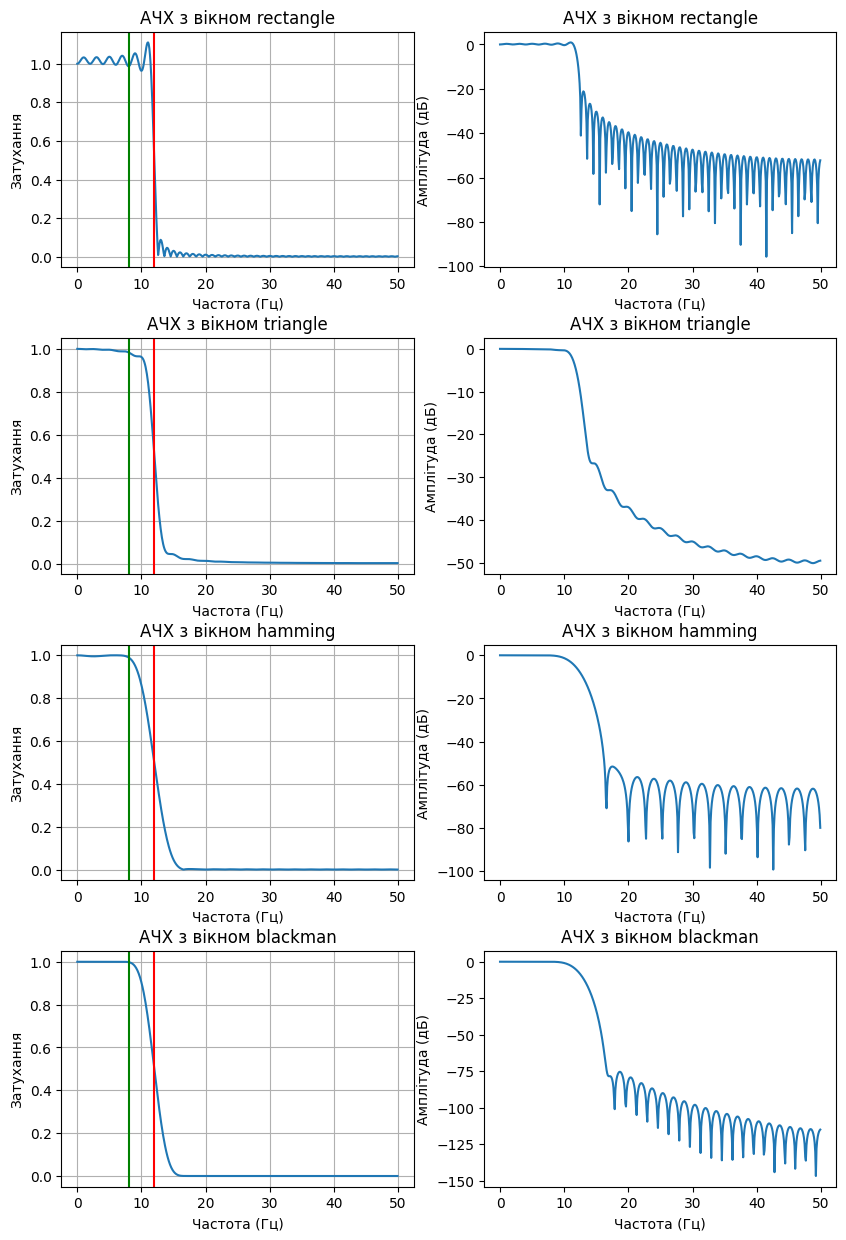

In [58]:
fig, axes = plt.subplots(len(filters), 2, figsize=(10, 15))
fig.subplots_adjust(hspace=0.3)
for i, taps in enumerate(filters):
    ax = axes[i]
    w, h = signal.freqz(taps, 1)
    ax[0].plot((fs * 0.5 / np.pi) * w, abs(h), label="Частотна характеристика")
    ax[0].axvline(fp, color='green', label="Частота смуги пропускання")
    ax[0].axvline(fa, color='red', label="Частота смуги загородження")
    ax[0].set_xlabel('Частота (Гц)')
    ax[0].set_ylabel('Затухання')
    ax[0].set_title(f'АЧХ з вікном {filters_names[i]}')
    ax[0].grid(True)
    
    w, h_freqz = signal.freqz(taps)

    # Обчислення ФП
    h_phase = np.unwrap(np.angle(h_freqz))
    h_db = 20*np.log10(np.abs(h_freqz))

    # Візуалізація ЧХ
    ax[1].plot((fs * 0.5 / np.pi) * w, h_db)
    ax[1].set_xlabel('Частота (Гц)')
    ax[1].set_ylabel('Амплітуда (дБ)')
    ax[1].set_title(f'АЧХ з вікном {filters_names[i]}')
plt.show()